In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('KurlaMumbaiMPCB.csv')

# Convert 'From Date' to datetime
data['From Date'] = pd.to_datetime(data['From Date'])

# Define AQI calculation function (using Indian CPCB breakpoints)
def calculate_aqi(pm25, pm10, no2, so2, co, o3):
    # Initialize sub-indices
    aqi_pm25 = aqi_pm10 = aqi_no2 = aqi_so2 = aqi_co = aqi_o3 = 0

    # Handle NaN values
    if pd.isna(pm25): aqi_pm25 = 0
    if pd.isna(pm10): aqi_pm10 = 0
    if pd.isna(no2): aqi_no2 = 0
    if pd.isna(so2): aqi_so2 = 0
    if pd.isna(co): aqi_co = 0
    if pd.isna(o3): aqi_o3 = 0

    # PM2.5 Breakpoints (µg/m³)
    if not pd.isna(pm25):
        if pm25 <= 30: aqi_pm25 = (50 / 30) * pm25
        elif pm25 <= 60: aqi_pm25 = 50 + (50 / 30) * (pm25 - 30)
        elif pm25 <= 90: aqi_pm25 = 100 + (100 / 30) * (pm25 - 60)
        elif pm25 <= 120: aqi_pm25 = 200 + (100 / 30) * (pm25 - 90)
        elif pm25 <= 250: aqi_pm25 = 300 + (100 / 130) * (pm25 - 120)
        elif pm25 > 250: aqi_pm25 = 400 + (100 / 250) * (pm25 - 250)

    # PM10 Breakpoints (µg/m³)
    if not pd.isna(pm10):
        if pm10 <= 50: aqi_pm10 = (50 / 50) * pm10
        elif pm10 <= 100: aqi_pm10 = 50 + (50 / 50) * (pm10 - 50)
        elif pm10 <= 250: aqi_pm10 = 100 + (100 / 150) * (pm10 - 100)
        elif pm10 <= 350: aqi_pm10 = 200 + (100 / 100) * (pm10 - 250)
        elif pm10 <= 430: aqi_pm10 = 300 + (100 / 80) * (pm10 - 350)
        elif pm10 > 430: aqi_pm10 = 400 + (100 / 430) * (pm10 - 430)

    # NO2 Breakpoints (µg/m³)
    if not pd.isna(no2):
        if no2 <= 40: aqi_no2 = (50 / 40) * no2
        elif no2 <= 80: aqi_no2 = 50 + (50 / 40) * (no2 - 40)
        elif no2 <= 180: aqi_no2 = 100 + (100 / 100) * (no2 - 80)
        elif no2 <= 280: aqi_no2 = 200 + (100 / 100) * (no2 - 180)
        elif no2 <= 400: aqi_no2 = 300 + (100 / 120) * (no2 - 280)
        elif no2 > 400: aqi_no2 = 400 + (100 / 400) * (no2 - 400)

    # SO2 Breakpoints (µg/m³)
    if not pd.isna(so2):
        if so2 <= 40: aqi_so2 = (50 / 40) * so2
        elif so2 <= 80: aqi_so2 = 50 + (50 / 40) * (so2 - 40)
        elif so2 <= 380: aqi_so2 = 100 + (100 / 300) * (so2 - 80)
        elif so2 <= 800: aqi_so2 = 200 + (100 / 420) * (so2 - 380)
        elif so2 <= 1600: aqi_so2 = 300 + (100 / 800) * (so2 - 800)
        elif so2 > 1600: aqi_so2 = 400 + (100 / 1600) * (so2 - 1600)

    # CO Breakpoints (mg/m³)
    if not pd.isna(co):
        if co <= 1: aqi_co = (50 / 1) * co
        elif co <= 2: aqi_co = 50 + (50 / 1) * (co - 1)
        elif co <= 10: aqi_co = 100 + (100 / 8) * (co - 2)
        elif co <= 17: aqi_co = 200 + (100 / 7) * (co - 10)
        elif co <= 34: aqi_co = 300 + (100 / 17) * (co - 17)
        elif co > 34: aqi_co = 400 + (100 / 34) * (co - 34)

    # Ozone (O3) Breakpoints (µg/m³)
    if not pd.isna(o3):
        if o3 <= 50: aqi_o3 = (50 / 50) * o3
        elif o3 <= 100: aqi_o3 = 50 + (50 / 50) * (o3 - 50)
        elif o3 <= 168: aqi_o3 = 100 + (100 / 68) * (o3 - 100)
        elif o3 <= 208: aqi_o3 = 200 + (100 / 40) * (o3 - 168)
        elif o3 <= 748: aqi_o3 = 300 + (100 / 540) * (o3 - 208)
        elif o3 > 748: aqi_o3 = 400 + (100 / 748) * (o3 - 748)

    # Return the maximum sub-index
    return max(aqi_pm25, aqi_pm10, aqi_no2, aqi_so2, aqi_co, aqi_o3)

# Apply AQI calculation
data['AQI'] = data.apply(lambda row: calculate_aqi(row['PM2.5'], row['PM10'], row['NO2'], 
                                                  row['SO2'], row['CO'], row['Ozone']), axis=1)

# Aggregate to daily data
daily_data = data.resample('D', on='From Date').mean(numeric_only=True).reset_index()

# Handle missing values in AQI
daily_data['AQI'] = daily_data['AQI'].interpolate(method='linear')

# Optional: Check the first few rows of daily_data
print(daily_data[['From Date', 'AQI']].head())

# Optional: Save the preprocessed data
daily_data.to_csv('daily_aqi_data.csv', index=False)

   From Date         AQI
0 2021-01-01  325.462831
1 2021-01-02  205.097741
2 2021-01-03  180.970208
3 2021-01-04  174.853750
4 2021-01-05   60.201424


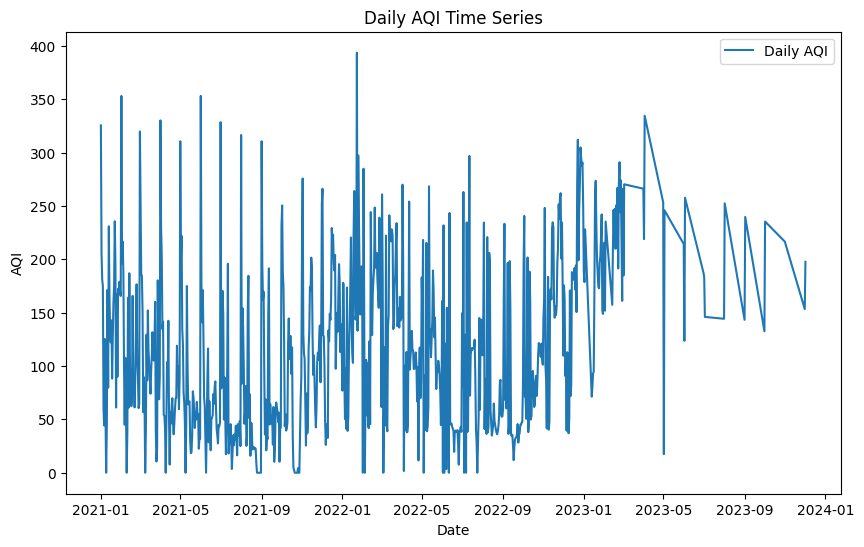

ADF Statistic: -2.661050715638965
p-value: 0.08102407726043609
Critical Values: {'1%': -3.4366231443991118, '5%': -2.864309749608104, '10%': -2.568244725395481}
Series is non-stationary (fail to reject null hypothesis)
ADF Statistic: -11.554800897637396
p-value: 3.3792526031244557e-21
Critical Values: {'1%': -3.4366231443991118, '5%': -2.864309749608104, '10%': -2.568244725395481}
Series is stationary (reject null hypothesis)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Assuming daily_data is already created from the previous step
# Plot the AQI time series
plt.figure(figsize=(10, 6))
plt.plot(daily_data['From Date'], daily_data['AQI'], label='Daily AQI')
plt.title('Daily AQI Time Series')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

# Check stationarity with Augmented Dickey-Fuller test
def check_stationarity(series):
    result = adfuller(series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Series is stationary (reject null hypothesis)")
    else:
        print("Series is non-stationary (fail to reject null hypothesis)")

check_stationarity(daily_data['AQI'])

# If non-stationary, difference the series
daily_data['AQI_diff'] = daily_data['AQI'].diff().dropna()
check_stationarity(daily_data['AQI_diff'])

SMA Forecast for next day: 164.18


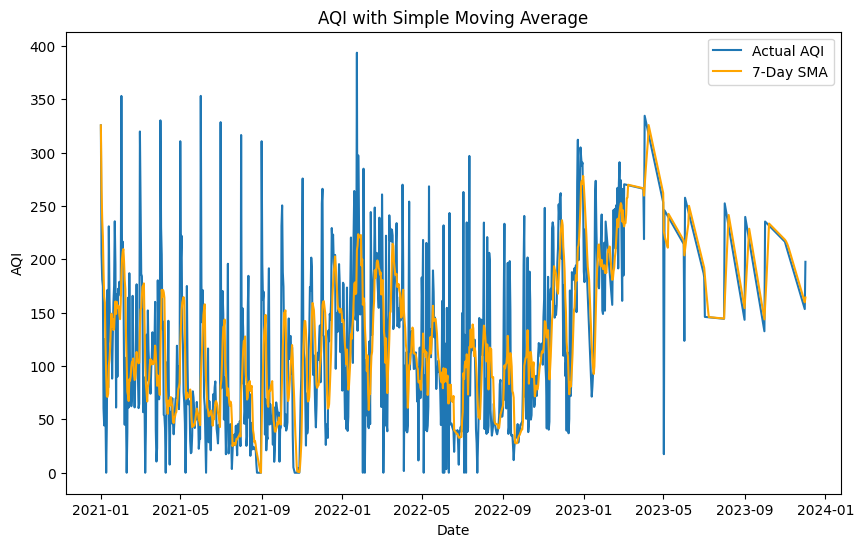

In [5]:
# Simple Moving Average (7-day window)
daily_data['SMA_7'] = daily_data['AQI'].rolling(window=7, min_periods=1).mean()

# Forecast for next day
sma_forecast = daily_data['SMA_7'].iloc[-1]
print(f"SMA Forecast for next day: {sma_forecast:.2f}")

# Plot SMA
plt.figure(figsize=(10, 6))
plt.plot(daily_data['From Date'], daily_data['AQI'], label='Actual AQI')
plt.plot(daily_data['From Date'], daily_data['SMA_7'], label='7-Day SMA', color='orange')
plt.title('AQI with Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

Holt-Winters Forecast for next day: 172.18


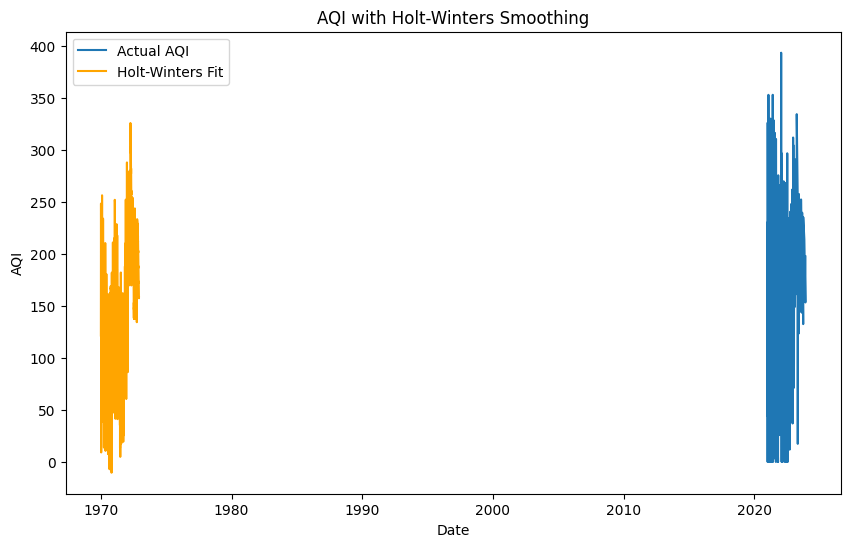

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model (additive trend and seasonality, period=7 for weekly)
model_hw = ExponentialSmoothing(daily_data['AQI'].dropna(), trend='add', seasonal='add', seasonal_periods=7)
hw_fit = model_hw.fit()

# Forecast next day
hw_forecast = hw_fit.forecast(steps=1).iloc[0]
print(f"Holt-Winters Forecast for next day: {hw_forecast:.2f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(daily_data['From Date'], daily_data['AQI'], label='Actual AQI')
plt.plot(hw_fit.fittedvalues.index, hw_fit.fittedvalues, label='Holt-Winters Fit', color='orange')
plt.title('AQI with Holt-Winters Smoothing')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

AR Forecast for next day: 171.90


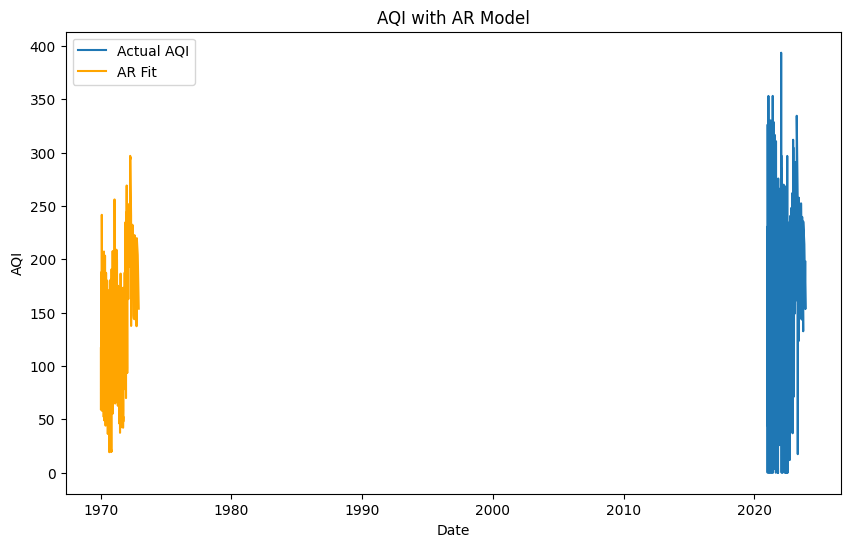

In [7]:
from statsmodels.tsa.ar_model import AutoReg

# Fit AR model (lag=7)
model_ar = AutoReg(daily_data['AQI'].dropna(), lags=7)
ar_fit = model_ar.fit()

# Forecast next day
ar_forecast = ar_fit.predict(start=len(daily_data), end=len(daily_data)).iloc[0]
print(f"AR Forecast for next day: {ar_forecast:.2f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(daily_data['From Date'], daily_data['AQI'], label='Actual AQI')
plt.plot(ar_fit.fittedvalues.index, ar_fit.fittedvalues, label='AR Fit', color='orange')
plt.title('AQI with AR Model')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

MA Forecast for next day: 170.74


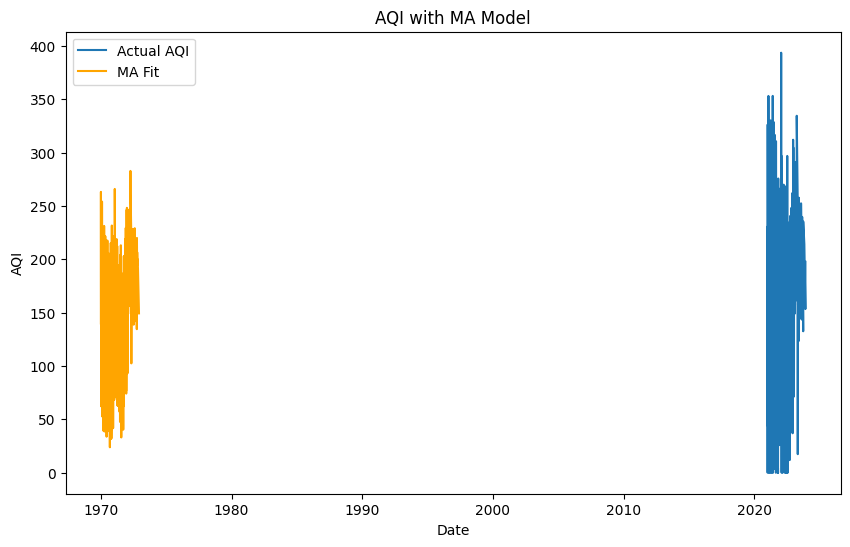

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Fit MA model (order=(0,0,7))
model_ma = ARIMA(daily_data['AQI'].dropna(), order=(0, 0, 7))
ma_fit = model_ma.fit()

# Forecast next day
ma_forecast = ma_fit.forecast(steps=1).iloc[0]
print(f"MA Forecast for next day: {ma_forecast:.2f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(daily_data['From Date'], daily_data['AQI'], label='Actual AQI')
plt.plot(ma_fit.fittedvalues.index, ma_fit.fittedvalues, label='MA Fit', color='orange')
plt.title('AQI with MA Model')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

ARIMA Forecast for next day: 188.29


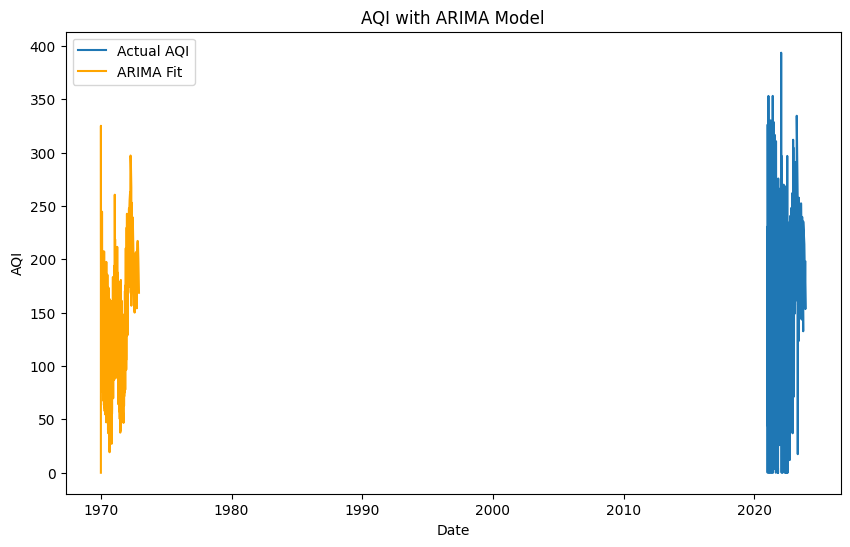

In [9]:
# Fit ARIMA model (order=(1,1,1))
model_arima = ARIMA(daily_data['AQI'].dropna(), order=(1, 1, 1))
arima_fit = model_arima.fit()

# Forecast next day
arima_forecast = arima_fit.forecast(steps=1).iloc[0]
print(f"ARIMA Forecast for next day: {arima_forecast:.2f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(daily_data['From Date'], daily_data['AQI'], label='Actual AQI')
plt.plot(arima_fit.fittedvalues.index, arima_fit.fittedvalues, label='ARIMA Fit', color='orange')
plt.title('AQI with ARIMA Model')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

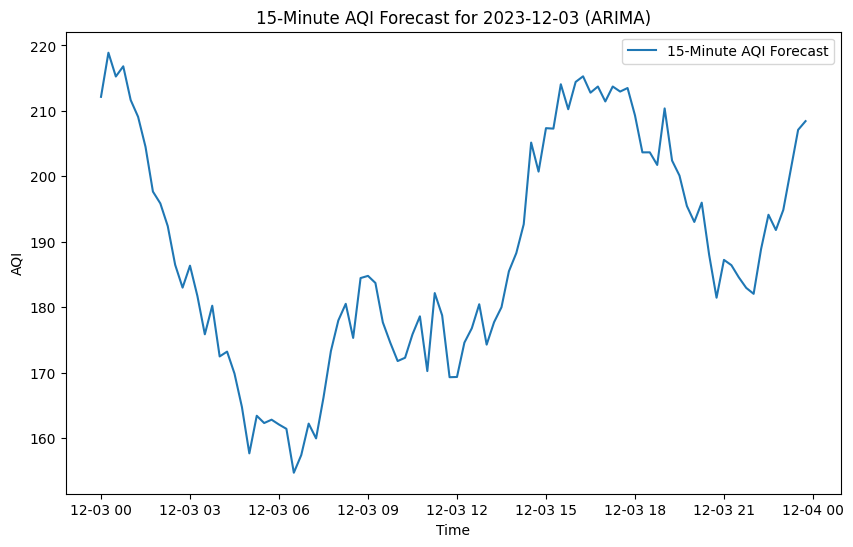

In [10]:
# Calculate average intraday pattern from original data
data['Time'] = data['From Date'].dt.time
intraday_pattern = data.groupby('Time')['AQI'].mean()
intraday_pattern = intraday_pattern / intraday_pattern.mean()  # Normalize

# Generate 15-minute timestamps for the next day
last_date = daily_data['From Date'].iloc[-1]
next_day_start = last_date + pd.Timedelta(days=1)
next_day_dates = pd.date_range(start=next_day_start, periods=96, freq='15min')

# Distribute ARIMA forecast (example) over 15-minute intervals
arima_15min_forecast = arima_forecast * intraday_pattern.values
forecast_df = pd.DataFrame({'Date': next_day_dates, 'AQI_Forecast': arima_15min_forecast})

# Plot 15-minute forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Date'], forecast_df['AQI_Forecast'], label='15-Minute AQI Forecast')
plt.title(f'15-Minute AQI Forecast for {next_day_start.date()} (ARIMA)')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.legend()
plt.show()

# Save forecast
forecast_df.to_csv('next_day_aqi_forecast.csv', index=False)

In [11]:
from sklearn.metrics import mean_absolute_error

# Split into train and test (last 30 days as test)
train = daily_data['AQI'][:-30].dropna()
test = daily_data['AQI'][-30:].dropna()

# Evaluate ARIMA (example)
arima_model_eval = ARIMA(train, order=(1, 1, 1)).fit()
arima_pred = arima_model_eval.forecast(steps=30)
mae_arima = mean_absolute_error(test, arima_pred)
print(f"ARIMA MAE: {mae_arima:.2f}")

# You can repeat this for SMA, Holt-Winters, AR, and MA by fitting on train and predicting test

ARIMA MAE: 32.26


In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

# Assuming daily_data is your preprocessed DataFrame
train = daily_data['AQI'][:-30].dropna()  # All but last 30 days
test = daily_data['AQI'][-30:].dropna()   # Last 30 days
train_dates = daily_data['From Date'][:-30]
test_dates = daily_data['From Date'][-30:]

In [13]:
# Dictionary to store results
results = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': []}

# 1. Simple Moving Average (SMA)
window = 7
train_sma = train.rolling(window=window, min_periods=1).mean()
sma_forecast = pd.Series([train_sma.iloc[-1]] * 30, index=test.index)  # Repeat last SMA value
results['Model'].append('SMA')
results['MAE'].append(mean_absolute_error(test, sma_forecast))
results['MSE'].append(mean_squared_error(test, sma_forecast))
results['RMSE'].append(np.sqrt(mean_squared_error(test, sma_forecast)))

# 2. Holt-Winters Method
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7).fit()
hw_forecast = hw_model.forecast(steps=30)
results['Model'].append('Holt-Winters')
results['MAE'].append(mean_absolute_error(test, hw_forecast))
results['MSE'].append(mean_squared_error(test, hw_forecast))
results['RMSE'].append(np.sqrt(mean_squared_error(test, hw_forecast)))

# 3. Autoregressive (AR) Model
ar_model = AutoReg(train, lags=7).fit()
ar_forecast = ar_model.predict(start=len(train), end=len(train) + 29)
results['Model'].append('AR')
results['MAE'].append(mean_absolute_error(test, ar_forecast))
results['MSE'].append(mean_squared_error(test, ar_forecast))
results['RMSE'].append(np.sqrt(mean_squared_error(test, ar_forecast)))

# 4. Moving Average (MA) Model
ma_model = ARIMA(train, order=(0, 0, 7)).fit()
ma_forecast = ma_model.forecast(steps=30)
results['Model'].append('MA')
results['MAE'].append(mean_absolute_error(test, ma_forecast))
results['MSE'].append(mean_squared_error(test, ma_forecast))
results['RMSE'].append(np.sqrt(mean_squared_error(test, ma_forecast)))

# 5. ARIMA Model
arima_model = ARIMA(train, order=(1, 1, 1)).fit()
arima_forecast = arima_model.forecast(steps=30)
results['Model'].append('ARIMA')
results['MAE'].append(mean_absolute_error(test, arima_forecast))
results['MSE'].append(mean_squared_error(test, arima_forecast))
results['RMSE'].append(np.sqrt(mean_squared_error(test, arima_forecast)))

In [14]:
# Create results DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Find the best model based on each metric
best_mae = results_df.loc[results_df['MAE'].idxmin()]
best_mse = results_df.loc[results_df['MSE'].idxmin()]
best_rmse = results_df.loc[results_df['RMSE'].idxmin()]

print("\nBest Model by MAE:")
print(best_mae)
print("\nBest Model by MSE:")
print(best_mse)
print("\nBest Model by RMSE:")
print(best_rmse)

          Model        MAE          MSE       RMSE
0           SMA  34.270111  1478.904142  38.456523
1  Holt-Winters  33.596213  1440.485081  37.953723
2            AR  14.133197   257.513233  16.047219
3            MA  38.850048  1701.850228  41.253487
4         ARIMA  32.258955  1346.773176  36.698408

Best Model by MAE:
Model            AR
MAE       14.133197
MSE      257.513233
RMSE      16.047219
Name: 2, dtype: object

Best Model by MSE:
Model            AR
MAE       14.133197
MSE      257.513233
RMSE      16.047219
Name: 2, dtype: object

Best Model by RMSE:
Model            AR
MAE       14.133197
MSE      257.513233
RMSE      16.047219
Name: 2, dtype: object


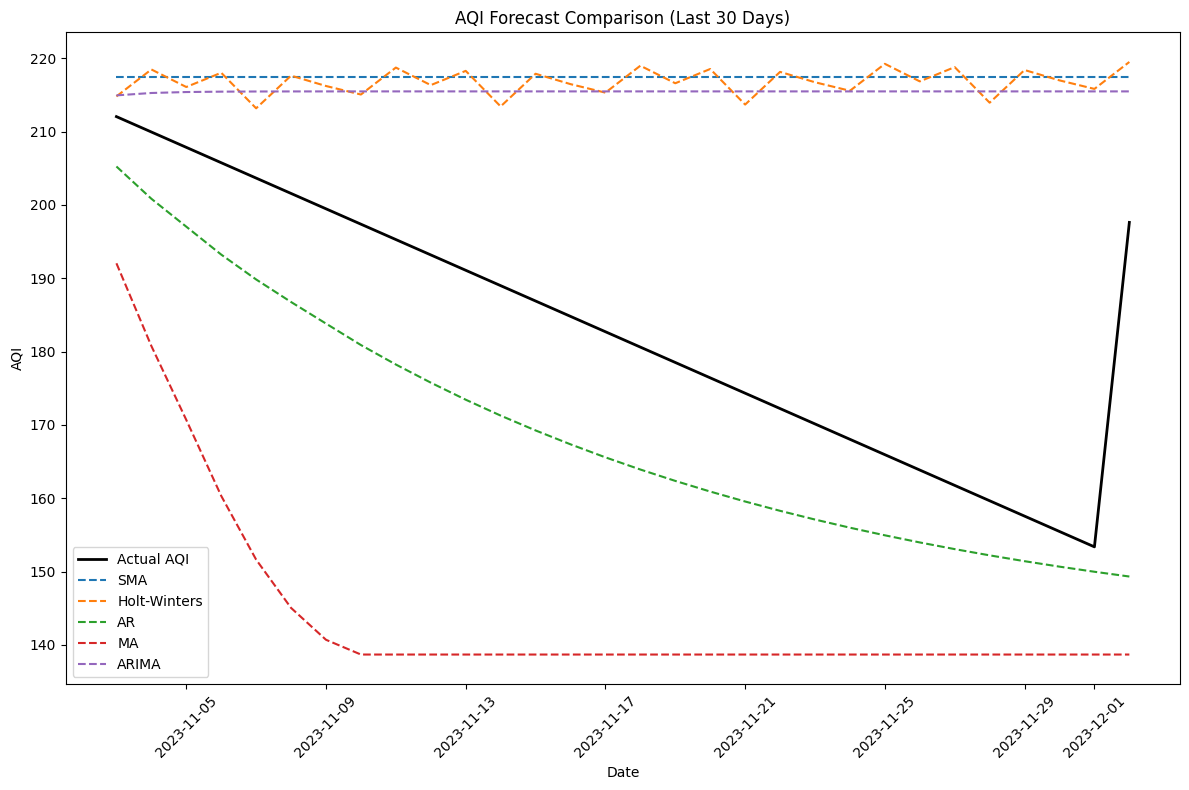

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(test_dates, test, label='Actual AQI', color='black', linewidth=2)
plt.plot(test_dates, sma_forecast, label='SMA', linestyle='--')
plt.plot(test_dates, hw_forecast, label='Holt-Winters', linestyle='--')
plt.plot(test_dates, ar_forecast, label='AR', linestyle='--')
plt.plot(test_dates, ma_forecast, label='MA', linestyle='--')
plt.plot(test_dates, arima_forecast, label='ARIMA', linestyle='--')
plt.title('AQI Forecast Comparison (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Assuming daily_data is your preprocessed DataFrame with 'AQI' column
aqi_series = daily_data['AQI'].dropna()

# Perform ADF test
adf_result = adfuller(aqi_series)

# Print results
print('ADF Test Results:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')

# Interpret the result
if adf_result[1] <= 0.05:
    print("The series is stationary (reject null hypothesis)")
else:
    print("The series is non-stationary (fail to reject null hypothesis)")

# If non-stationary, difference the series and re-test
aqi_diff = aqi_series.diff().dropna()
adf_result_diff = adfuller(aqi_diff)

print('\nADF Test Results (First Difference):')
print(f'ADF Statistic: {adf_result_diff[0]:.4f}')
print(f'p-value: {adf_result_diff[1]:.4f}')
print('Critical Values:')
for key, value in adf_result_diff[4].items():
    print(f'   {key}: {value:.4f}')

if adf_result_diff[1] <= 0.05:
    print("The differenced series is stationary")
else:
    print("The differenced series is still non-stationary")

ADF Test Results:
ADF Statistic: -2.6611
p-value: 0.0810
Critical Values:
   1%: -3.4366
   5%: -2.8643
   10%: -2.5682
The series is non-stationary (fail to reject null hypothesis)

ADF Test Results (First Difference):
ADF Statistic: -11.5548
p-value: 0.0000
Critical Values:
   1%: -3.4366
   5%: -2.8643
   10%: -2.5682
The differenced series is stationary


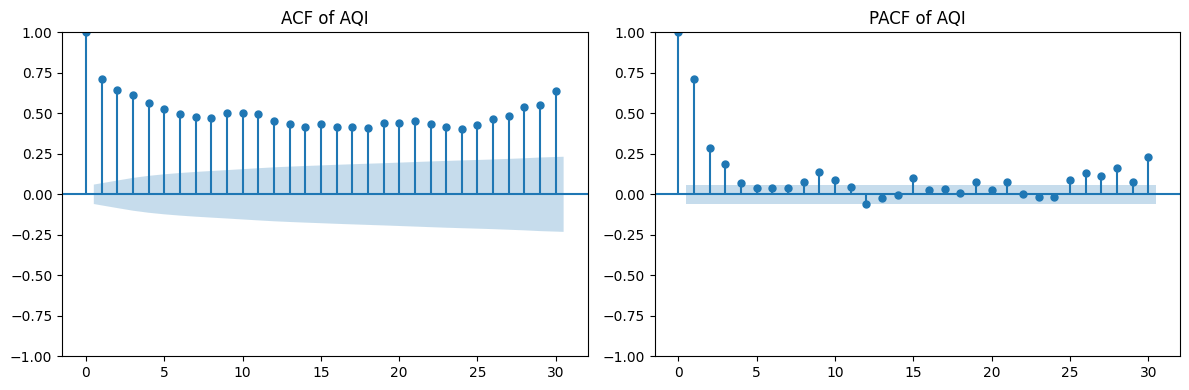

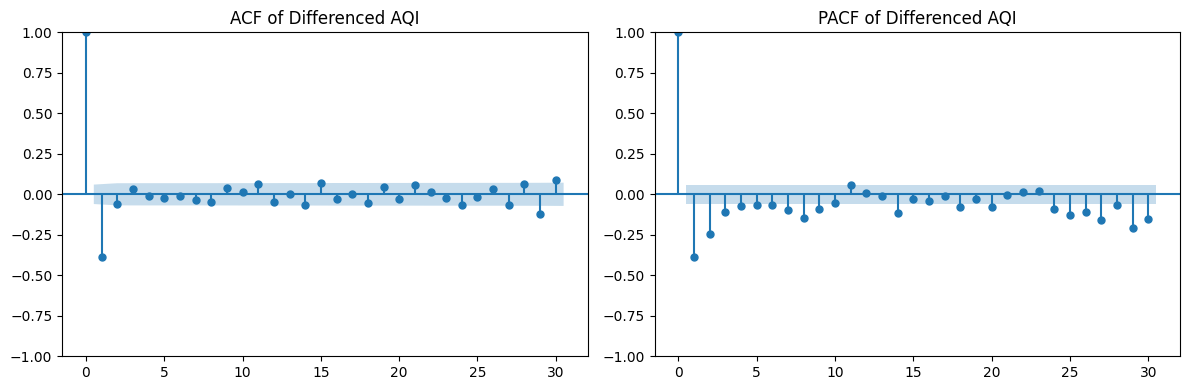

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_acf(aqi_series, lags=30, ax=plt.gca())
plt.title('ACF of AQI')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(aqi_series, lags=30, ax=plt.gca())
plt.title('PACF of AQI')
plt.tight_layout()
plt.show()

# If series is non-stationary, plot ACF/PACF for differenced series
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_acf(aqi_diff, lags=30, ax=plt.gca())
plt.title('ACF of Differenced AQI')

plt.subplot(1, 2, 2)
plot_pacf(aqi_diff, lags=30, ax=plt.gca())
plt.title('PACF of Differenced AQI')
plt.tight_layout()
plt.show()